# **Lab Digital Assignment - 2**

## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
file_paths = {
    "iris": "iris.csv",
    "mtcars": "mtcars.csv",
    "sales": "sales.csv",
    "titanic": "titanic.csv",
    "weather": "Weather Data.csv"
}

datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

## **Data Cleaning**

In [16]:
def clean_dataset(df):
    for col in df.select_dtypes(include=['number']).columns:
        df[col] = df[col].fillna(df[col].median())
    
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df


datasets = {name: clean_dataset(df.copy()) for name, df in datasets.items()}

In [17]:
def preprocess_for_pca(df):
    numerical_df = df.select_dtypes(include=['number'])  
    if numerical_df.shape[1] > 1:  
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numerical_df)
        return scaled_data, numerical_df.columns
    return None, None


processed_datasets = {name: preprocess_for_pca(df) for name, df in datasets.items()}


pca_results = {}
explained_variances = {}

for name, (data, cols) in processed_datasets.items():
    if data is not None:
        pca = PCA()
        pca.fit(data)
        pca_results[name] = pca
        explained_variances[name] = pca.explained_variance_ratio_

explained_variances

{'iris': array([0.74845859, 0.18287672, 0.04699932, 0.0175233 , 0.00414207]),
 'mtcars': array([0.60076366, 0.24095163, 0.05701793, 0.02450886, 0.02031374,
        0.01923601, 0.01229654, 0.01117286, 0.00700424, 0.00473049,
        0.00200404]),
 'sales': array([0.20640905, 0.20162081, 0.19881561, 0.19724633, 0.1959082 ]),
 'titanic': array([0.26661069, 0.23447227, 0.14282597, 0.13737943, 0.09016694,
        0.07795652, 0.05058818]),
 'weather': array([0.35045353, 0.30409954, 0.20929208, 0.07519325, 0.06057464,
        0.00038696])}

## **Scree Plots**

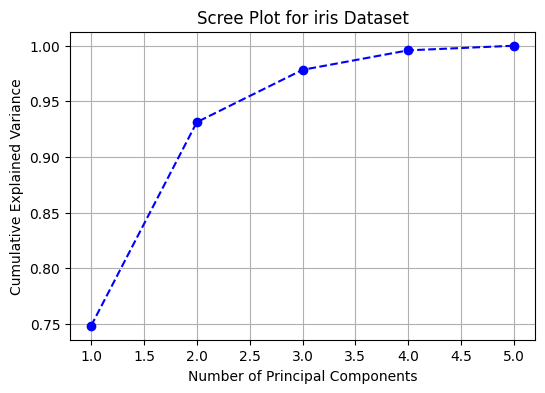

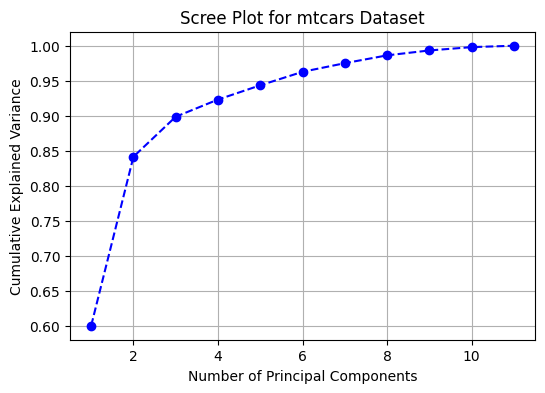

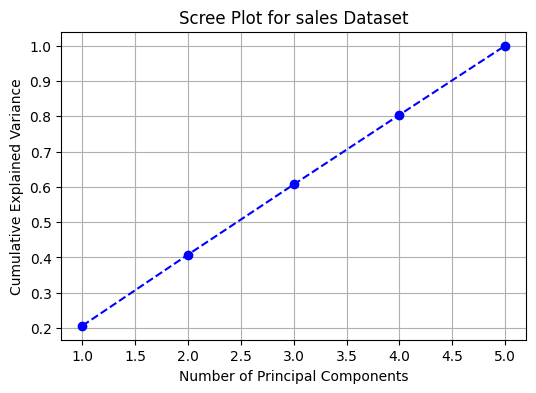

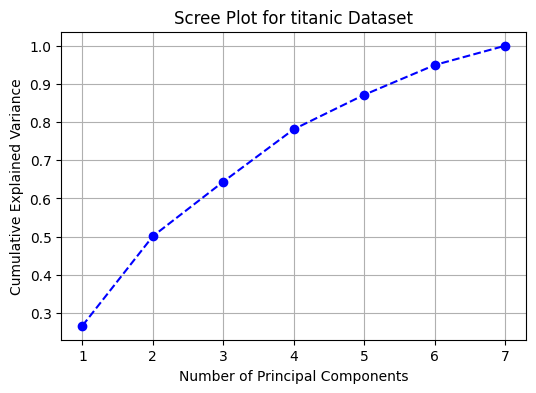

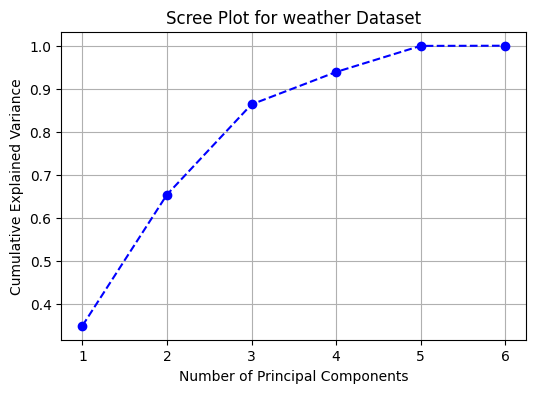

In [18]:
def plot_scree(name, pca):
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Scree Plot for {name} Dataset')
    plt.grid()
    plt.show()

for name, pca in pca_results.items():
    plot_scree(name, pca)

## **Scatter Plots**

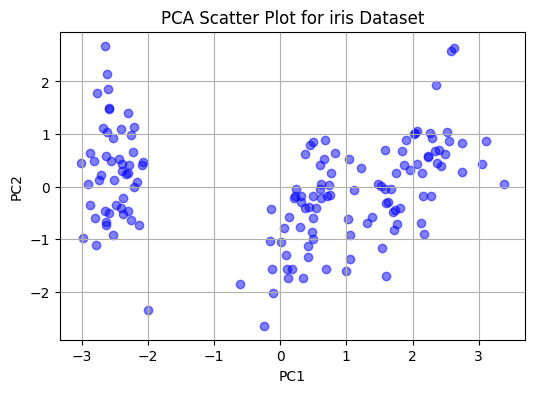

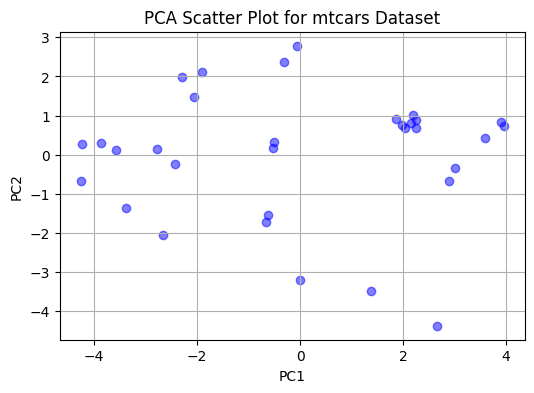

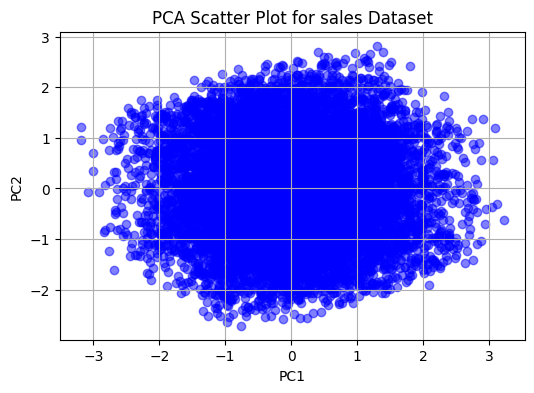

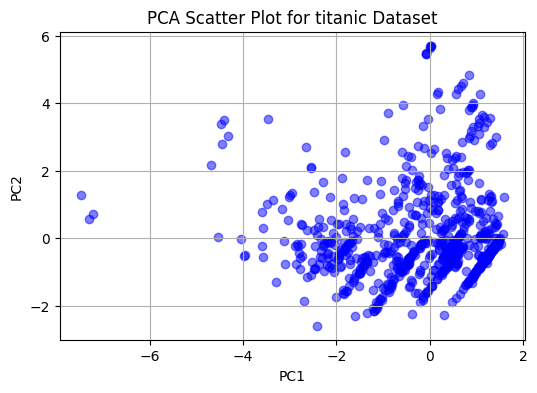

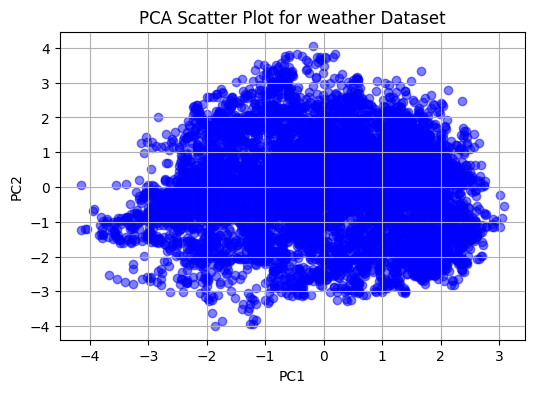

In [19]:
def plot_pca_scatter(name, data, pca):
    transformed_data = pca.transform(data)
    plt.figure(figsize=(6, 4))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5, color='b')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'PCA Scatter Plot for {name} Dataset')
    plt.grid()
    plt.show()

for name, (data, cols) in processed_datasets.items():
    if data is not None:
        plot_pca_scatter(name, data, pca_results[name])

# **Conclusion**

### **The PCA scatter plots reveal the structure of the reduced data:**

1. Iris: Shows clear clustering, meaning PCA effectively captures class differences.
2. Mtcars: Moderate separation, indicating some underlying patterns in car attributes.
3. Sales & Titanic: Points are more dispersed, suggesting PCA may not be as effective in reducing dimensions while preserving structure.
4. Weather: Some clustering but still significant overlap, meaning more components might be neede